<a href="https://colab.research.google.com/github/Fardeen210/Fardeen_INFO5731_Fall2024/blob/main/Mohameed_Fardeen_Ali_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here
import pandas as pd

# File paths
train_file_path = "/content/drive/MyDrive/Dataset/stsa-test.txt"
test_file_path = "/content/drive/MyDrive/Dataset/stsa-train.txt"


# Function to preprocess and load the data
def load_and_preprocess(file_path):


  with open(file_path, 'r') as file:
    lines = file.readlines()
    # Split the label and review text
    labels = [int(line[0]) for line in lines]

    reviews = [line[2:].strip() for line in lines]
    # Create a DataFrame
    return pd.DataFrame({"review": reviews, "sentiment": labels})

# Load train and test datasets
train_data = load_and_preprocess(train_file_path)
test_data = load_and_preprocess(test_file_path)

# Display the first few rows
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Training Data:
                                              review  sentiment
0     no movement , no yuks , not much of anything .          0
1  a gob of drivel so sickly sweet , even the eag...          0
2  gangs of new york is an unapologetic mess , wh...          0
3  we never really feel involved with the story ,...          0
4            this is one of polanski 's best films .          1

Test Data:
                                              review  sentiment
0  a stirring , funny and finally transporting re...          1
1  apparently reassembled from the cutting-room f...          0
2  they presume their audience wo n't sit still f...          0
3  this is a visually stunning rumination on love...          1
4  jonathan parker 's bartleby should have been t...          1


In [ ]:
test_data.shape

(6920, 2)

In [ ]:
# As the Training dataset contains review and sentiment.
# we need split the dataset into train and test

In [6]:
X_train_data = train_data['review']  # Features for training
y_train_data = train_data['sentiment']  # Labels for training

X_test_data = test_data['review']  # Features for testing
y_test_data = test_data['sentiment']  # Labels for testing

In [4]:
#lets upload the data into train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#80% is for training and 20% is for testing
X1_train, X1_val, Y1_train, Y1_val = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=40)

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import metrics

# these are the metrics import for evaluating
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:

def evaluating_all_models(X_train, Y_train, X_test, Y_test):
  models = {
      'MultinomialNB': MultinomialNB(),
      'SVM': SVC(),
      'KNN': KNeighborsClassifier(),
      'DecisionTree': DecisionTreeClassifier(),
      "RandomForest": RandomForestClassifier(n_estimators=100),
      "XGBoost": XGBClassifier(eval_metric='logloss') }

  vectorizer = TfidfVectorizer(max_features=5000)

  results = []
  for name, model in models.items():

    model_name = name
    pipeline = make_pipeline(vectorizer, model)

    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=kf, scoring='accuracy')

    #pipeline.fit(X_train, Y_train)

    X_prediction = pipeline.predict(X_test)
    accuracy = accuracy_score(Y_test, X_prediction)
    recall = recall_score(Y_test, X_prediction, average='binary')
    precision = precision_score(Y_test, X_prediction, average='binary')
    f1 = f1_score(Y_test, X_prediction, average='binary')

    results.append({
        "Model": model_name,
        "CV Accuracy (Mean)": np.mean(cv_scores),
        "Validation Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })
  return results

In [ ]:
#Spliting the "training data" into training and testing data (80% for training and 20% for validation,).
evaluating_all_models(X1_train, Y1_train, X1_val, Y1_val)

[{'Model': 'MultinomialNB',
  'CV Accuracy (Mean)': 0.7370004723665564,
  'Validation Accuracy': 0.7342465753424657,
  'Recall': 0.7277777777777777,
  'Precision': 0.7318435754189944,
  'F1 Score': 0.7298050139275766},
 {'Model': 'SVM',
  'CV Accuracy (Mean)': 0.7129003306565895,
  'Validation Accuracy': 0.6904109589041096,
  'Recall': 0.7277777777777777,
  'Precision': 0.6717948717948717,
  'F1 Score': 0.6986666666666667},
 {'Model': 'KNN',
  'CV Accuracy (Mean)': 0.6503448275862069,
  'Validation Accuracy': 0.6383561643835617,
  'Recall': 0.6666666666666666,
  'Precision': 0.625,
  'F1 Score': 0.6451612903225806},
 {'Model': 'DecisionTree',
  'CV Accuracy (Mean)': 0.583103448275862,
  'Validation Accuracy': 0.5589041095890411,
  'Recall': 0.5777777777777777,
  'Precision': 0.5502645502645502,
  'F1 Score': 0.5636856368563685},
 {'Model': 'RandomForest',
  'CV Accuracy (Mean)': 0.6764997638167218,
  'Validation Accuracy': 0.6547945205479452,
  'Recall': 0.6888888888888889,
  'Precisio

In [ ]:
#The final trained model evaluated on the test data
evaluating_all_models(X1_train, Y1_train, X_test_data, y_test_data)

[{'Model': 'MultinomialNB',
  'CV Accuracy (Mean)': 0.7370004723665564,
  'Validation Accuracy': 0.7420520231213873,
  'Recall': 0.7232686980609419,
  'Precision': 0.7686193700323816,
  'F1 Score': 0.7452547452547452},
 {'Model': 'SVM',
  'CV Accuracy (Mean)': 0.7129003306565895,
  'Validation Accuracy': 0.7251445086705203,
  'Recall': 0.7445983379501385,
  'Precision': 0.732824427480916,
  'F1 Score': 0.7386644682605111},
 {'Model': 'KNN',
  'CV Accuracy (Mean)': 0.6503448275862069,
  'Validation Accuracy': 0.6871387283236994,
  'Recall': 0.7024930747922438,
  'Precision': 0.699200441135925,
  'F1 Score': 0.7008428907005665},
 {'Model': 'DecisionTree',
  'CV Accuracy (Mean)': 0.6057345299952763,
  'Validation Accuracy': 0.5695086705202312,
  'Recall': 0.56398891966759,
  'Precision': 0.5916884626562046,
  'F1 Score': 0.5775067366331017},
 {'Model': 'RandomForest',
  'CV Accuracy (Mean)': 0.6799055266887104,
  'Validation Accuracy': 0.6622832369942196,
  'Recall': 0.650415512465374,
  

In [7]:
''' PreProcessing Text of Training and Texting data set'''
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def preprocess_text(text):
    text = text.lower()
    text =remove_punctuation(text)
    text = remove_special_characters(text)
    tokens = nltk.word_tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = ["" if t.isdigit() else t for t in tokens]
    return tokens

train_data['processed_text'] = train_data['review'].apply(preprocess_text)
test_data['processed_text'] = test_data['review'].apply(preprocess_text)

In [12]:
train_data.head()

,review,sentiment,processed_text
0,"no movement , no yuks , not much of anything .",0,"[movement, yuks, much, anything]"
1,"a gob of drivel so sickly sweet , even the eag...",0,"[gob, drivel, sickly, sweet, even, eager, cons..."
2,"gangs of new york is an unapologetic mess , wh...",0,"[gangs, new, york, unapologetic, mess, whose, ..."
3,"we never really feel involved with the story ,...",0,"[never, really, feel, involved, story, ideas, ..."
4,this is one of polanski 's best films .,1,"[one, polanski, best, films]"


In [ ]:
test_data.head()


,review,sentiment,processed_text
0,"a stirring , funny and finally transporting re...",1,"[stirring, funny, finally, transporting, reima..."
1,apparently reassembled from the cutting-room f...,0,"[apparently, reassembled, cuttingroom, floor, ..."
2,they presume their audience wo n't sit still f...,0,"[presume, audience, wo, nt, sit, still, sociol..."
3,this is a visually stunning rumination on love...,1,"[visually, stunning, rumination, love, memory,..."
4,jonathan parker 's bartleby should have been t...,1,"[jonathan, parker, bartleby, beallendall, mode..."


In [ ]:
# here we are dividing the train data
X_train1 = train_data['processed_text']
y_train = train_data['sentiment']

# here we are dividing the test data
X_test1 = test_data['processed_text']
y_test = test_data['sentiment']

In [ ]:
from gensim.models import Word2Vec
sentences = [str(sentence).split() for sentence in X_train1]
w2v_model = Word2Vec(sentences, window=5, min_count=3, workers=4)

In [ ]:
w2v_model

In [ ]:
# Vectorizing the text data
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

#here Ia m vectorizing the train and test data
vectorized_X_train = np.array([vectorize(str(sentence)) for sentence in X_train1])
vectorized_X_test = np.array([vectorize(str(sentence)) for sentence in X_test1])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#by using logisticRegression I am fitting and training the model
clf.fit(vectorized_X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#predicting over test vectorized
y_pred = clf.predict(vectorized_X_test)

#comparing
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label=1))
print('Recall:', recall_score(y_test, y_pred, pos_label=1))
print('F1 score:', f1_score(y_test, y_pred, pos_label =1 ))


Accuracy: 0.5135838150289017
Precision: 0.5727056019070322
Recall: 0.2662049861495845
F1 score: 0.363464447806354


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [75]:
import pandas as pd
file_path2 = "/content/drive/MyDrive/Dataset/Amazon_Unlocked_Mobile.csv"
# Load the CSV file
df = pd.read_csv(file_path2)

# A sample of 1000 coloums are taken for ease

df_sample=df.sample(1000)
df_sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
396203,Sony Xperia Z3+ (Z3 Plus) E6533 5.2-Inch 32GB ...,Sony,300.00,3,Didn't realize that the hubby ordered the Z3+....,0.0
90691,"BlackBerry Classic Factory Unlocked Cellphone,...",BlackBerry,149.99,5,Phone was amazing!! i loved it! unfortunately ...,0.0
245584,Moto Z Play + Hasselblad Camera Mod,NaN,699.98,5,"I had a Moto X Pure I got the Z Play, because ...",4.0
193665,HTC One M7 Blue 32GB Unlocked Smart Phone 3/4G...,HTC,399.99,2,the phone have problems,0.0
88123,BlackBerry Bold 9700 Unlocked GSM 3G World Pho...,BlackBerry,101.99,1,I recently bought this phone from Worldwide Di...,78.0


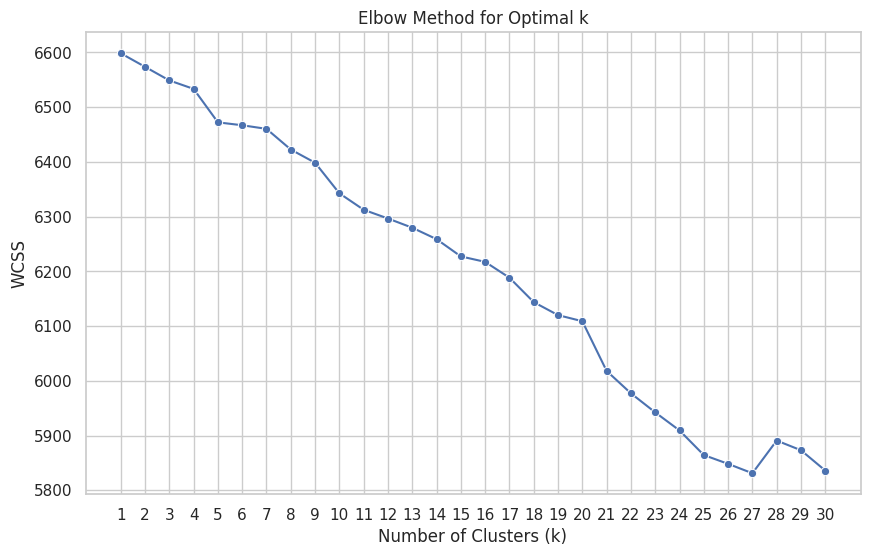

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'features' is your TF-IDF or sparse matrix data from vectorization
scaler = MaxAbsScaler()
scaled_features = scaler.fit_transform(features)  # Scales the sparse matrix without centering

# Calculate WCSS for a range of cluster numbers
wcss = []
ks = list(range(1, 31))  # Using a range from 1 to 30 for more options

for i in ks:
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(scaled_features)  # Fit the model on scaled features
    wcss.append(clustering.inertia_)

# Plot the elbow graph using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=ks, y=wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)  # Show all the k values on the x-axis
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(3, 10):
    clustering = KMeans(n_clusters=i, random_state=42)
    clustering.fit(scaled_features)
    score = silhouette_score(scaled_features, clustering.labels_)
    print(f"Silhouette score for k={i}: {score}")

Silhouette score for k=3: 0.40239606904463743
Silhouette score for k=4: 0.2843978781683703
Silhouette score for k=5: 0.2854152652851425
Silhouette score for k=6: -0.010125695641809169
Silhouette score for k=7: -0.010126810019362165
Silhouette score for k=8: -0.008924886408330624
Silhouette score for k=9: -0.00822308301684697


In [ ]:
'''K-means cluster'''

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df_sample['Reviews'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 5

model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df_sample['Cluster']= model.labels_
df_sample.head(10)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cluster
99964,BlackBerry Storm 2 9550 Unlocked Phone - No Wa...,BlackBerry,79.99,3,Not compatible with my contract area.The phone...,0.0,1
221595,"LG G3 D855 Unlocked Cellphone, International V...",NaN,218.88,1,buy this cel for my wife and cant open Faceboo...,0.0,0
9766,Apple iPhone 4 8GB Unlocked- Black,NaN,179.99,5,I bought this phone about three months ago. It...,0.0,1
388501,Sony Xperia Acro S LT26W Unlocked Android Phon...,Sony,330.40,4,"This phone was a gift from my husband, and i l...",0.0,1
35351,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5,Very good!!!!!,0.0,4
145570,BLU Studio C 5.0-Inch Smartphone with Android ...,BLU,99.99,3,BLU's version of OS 5.0 doesn't operate well.,0.0,0
252425,Motorola Moto G LTE- Factory Unlocked US Warra...,NaN,108.00,5,It is a great phone.,0.0,2
374360,Samsung Galaxy S7 Edge SM-G935F 32GB Factory U...,NaN,593.50,4,Yes I loved the product,0.0,0
384203,Samsung SCH-i545 Galaxy S4 16GB Android Smartp...,NaN,139.95,3,Love the phone...but it stopped charging,0.0,3
314065,Samsung Galaxy Grand Prime DUOS G531H/DS - Whi...,Samsung,169.99,3,the sound is not like samsung is it very diferent,1.0,0


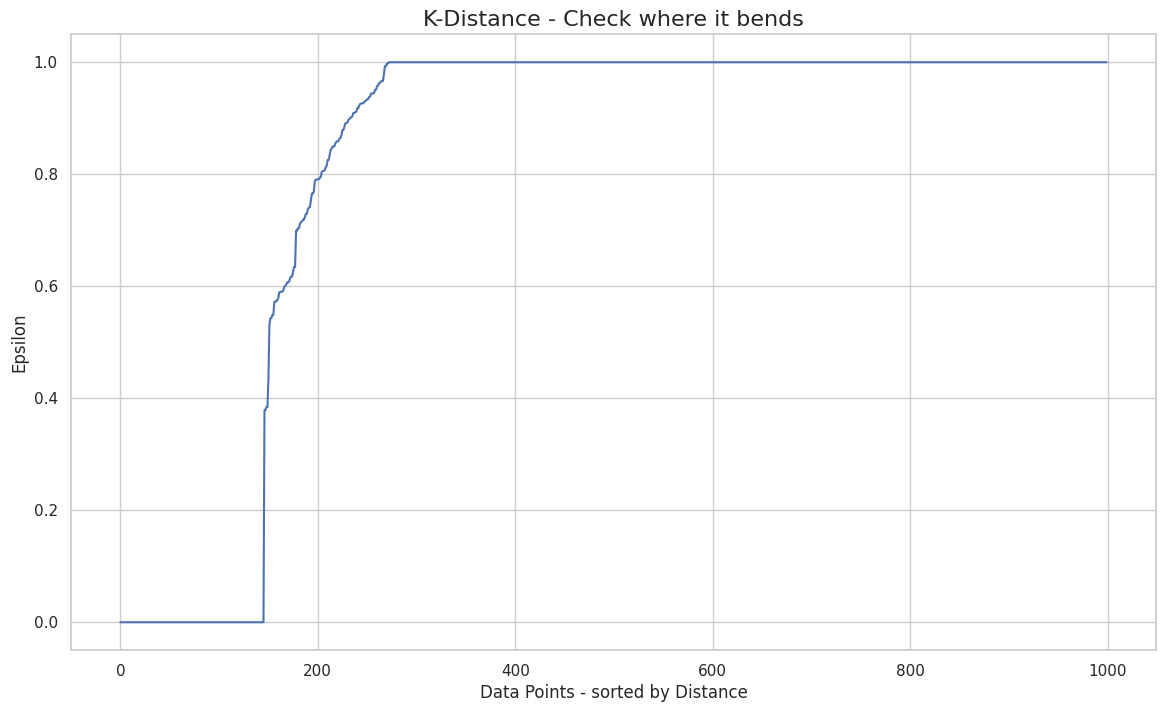

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

#DBSCAN without any parameter optimization and see the results.
dbscan=DBSCAN(eps=0.4, min_samples=4, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)


In [ ]:
# Write your code here

df_sample['DBSCAN_labels'] = model.labels_
df_sample['DBSCAN_labels'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def ward_hierarchical_clustering(feature_matrix):

    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['Product Name'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [ ]:
linkage_matrix = ward_hierarchical_clustering(features)

<ipython-input-33-801c63c7816a>:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


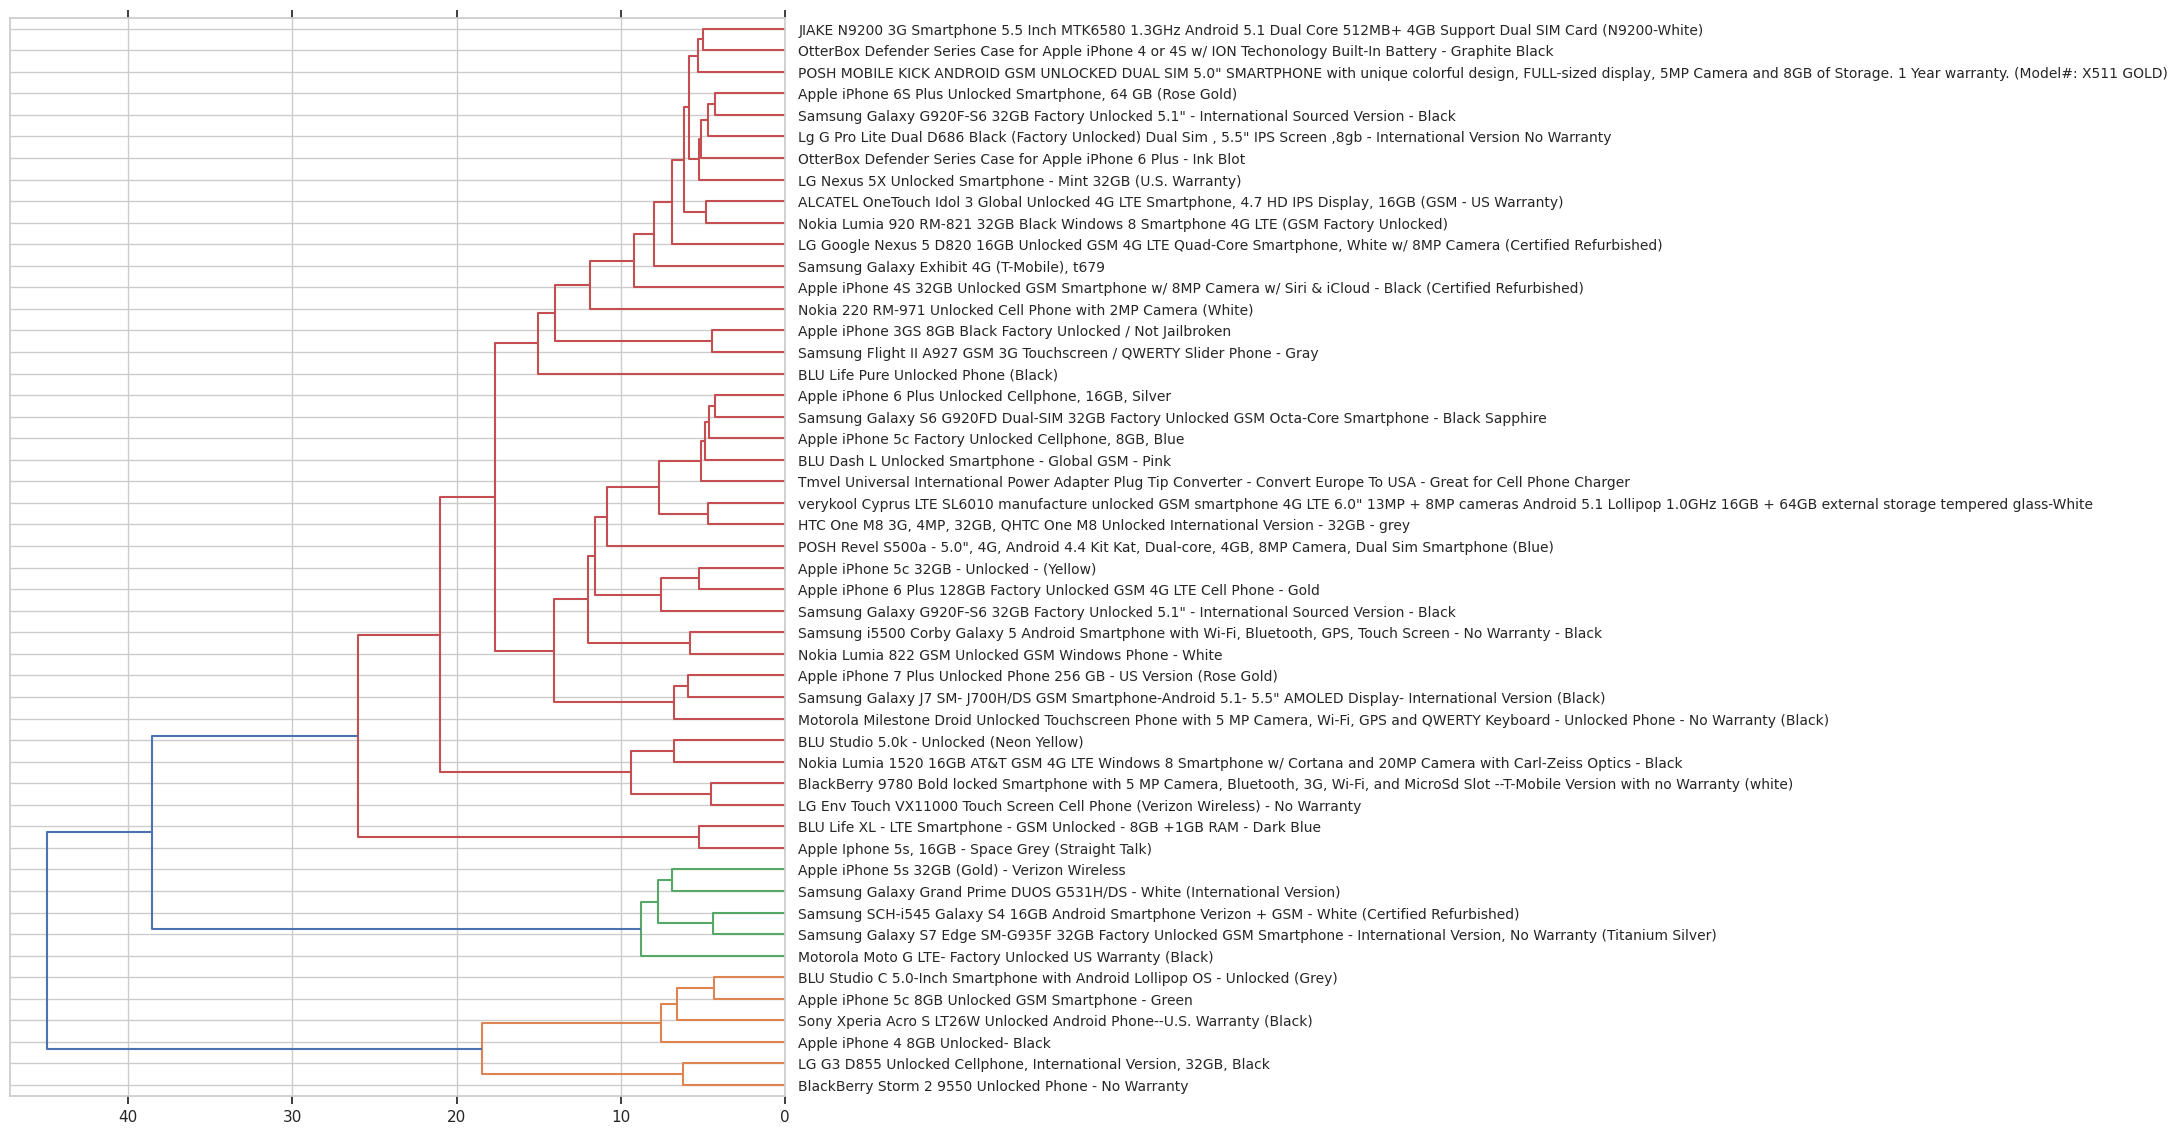

In [ ]:
import matplotlib.pyplot as plt
plot_hierarchical_clusters(linkage_matrix,
                           p=50,
                           movie_data=df_sample,
                           figure_size=(10, 14))

In [14]:
df_sample

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
59280,Apple iPhone 6 Plus Silver 16GB Unlocked Smart...,NaN,387.99,3,Few scratches on it,0.0
8773,Apple iPhone 4 32GB (Black) - Verizon,Apple,69.98,5,its like a brand new iphone 4s sans the box. A...,2.0
308061,Samsung Galaxy Alpha G850F 32GB Unlocked GSM 4...,Samsung,601.99,1,Going to return nothing said euro sim card only,3.0
295064,POSH MOBILE KICK ANDROID GSM UNLOCKED DUAL SIM...,Posh Mobile,69.99,5,Works great good camera runs smoothly and work...,1.0
170120,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,5,THAN kyou vry much,0.0
...,...,...,...,...,...,...
336233,"Samsung Galaxy S II 4G Prepaid Android Phone, ...",Samsung,185.00,5,I changed to this phone from the Motorola Triu...,34.0
13146,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,5,excelente producto,0.0
325831,Samsung Galaxy Note 4 N910a 32GB GSM Unlocked ...,Samsung,338.99,5,This phone works great for straight talk!!Upda...,0.0
385350,Samsung T959 Galaxy S Vibrant 4G GSM Unlocked ...,Samsung,69.99,1,Not as expected.,0.0


In [23]:
'''word2vec'''

#preprocessing text to perform word2vec and bert
from nltk import word_tokenize
import re
import string
from nltk.corpus import stopwords


custom_stopwords = set(stopwords.words("english"))
text_columns = ["title", "description", "content"]

def clean_text(text):

    stopwords = set(custom_stopwords)
    tokenizer = word_tokenize

    text = str(text).lower()  # Lowercase words
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

df_sample['processed_text'] = df_sample['Reviews'].apply(clean_text)


In [30]:
from gensim.models import Word2Vec
import os
import random
import numpy as np


SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

model = Word2Vec(sentences=df_sample['processed_text'] , vector_size=100, workers=1, seed=SEED)


In [32]:
# Extract the vocabulary and their corresponding vectors
word_vectors = model.wv  # This gives access to the trained word vectors
words = list(word_vectors.index_to_key)  # List of words in the vocabulary
vectors = np.array([word_vectors[word] for word in words])  # Convert to a NumPy array


In [33]:
from sklearn.cluster import KMeans

# Set the number of clusters
num_clusters = 10  # You can change this based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=SEED)
kmeans.fit(vectors)

# Assign each word to a cluster
word_clusters = {word: cluster for word, cluster in zip(words, kmeans.labels_)}


In [34]:
for cluster in range(num_clusters):
    cluster_words = [word for word, cluster_id in word_clusters.items() if cluster_id == cluster]
    print(f"Cluster {cluster}: {cluster_words}")


Cluster 0: ['ok', 'expected', 'brand', 'smart', 'verizon', 'arrived', 'awesome', 'overall', 'customer', 'low', 'weeks', 'dropped', 'order', 'cheap', 'month', 'stopped', 'worth', 'blu', 'pocket', 'absolutely', 'apple', 'version', 'seems', 'perfectly', 'next', 'mine', 'many', 'blackberry', 'display', 'described', 'mp', 'must', 'wanted', 'started', 'super', 'quickly', 'replace', 'refund', 'takes', 'touch', 'paid', 'buying', 'receive', 'needs', 'plan', 'sent', 'cool', 'international', 'nothing', 'headphones', 'picture', 'wasnt', 'theres', 'contacted', 'already', 'network', 'quick', 'someone', 'talk', 'available', 'found', 'experience', 'number', 'sometimes', 'deal', 'poor', 'download', 'wish', 'feels', 'highly', 'soon', 'gets', 'says', 'try', 'black', 'runs', 'wouldnt', 'mail', 'reason', 'lte', 'usage', 'video', 'took', 'company', 'etc', 'gps', 'contact', 'makes', 'moto', 'especially', 'windows', 'fits', 'os', 'check', 'id', 'instead', 'resolution', 'less', 'reception', 'longer', 'unlock',

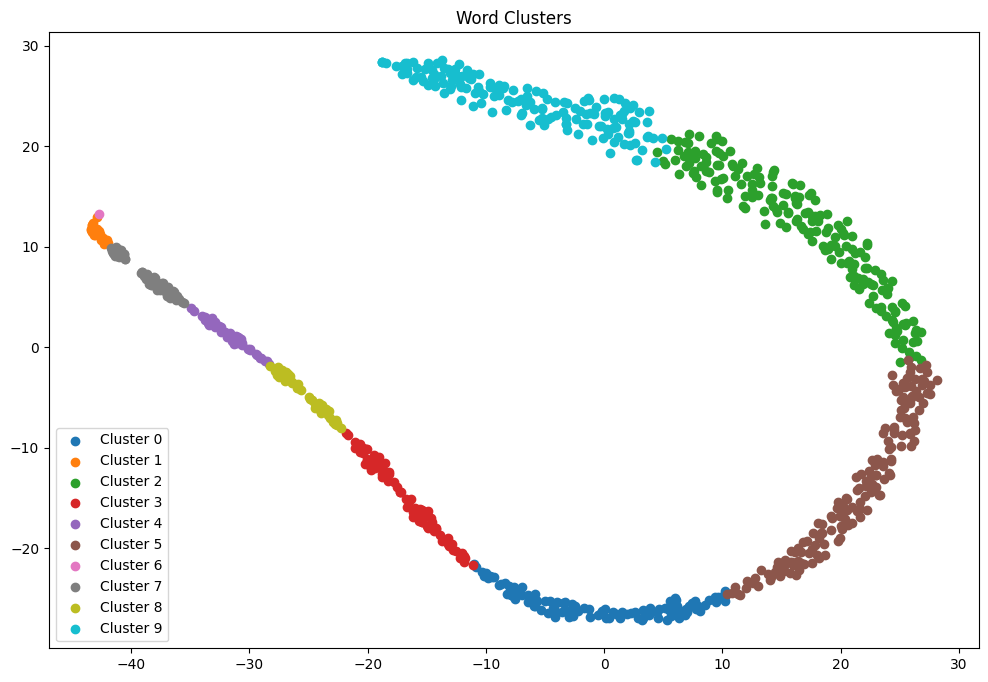

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=SEED)
reduced_vectors = tsne.fit_transform(vectors)

# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[kmeans.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.legend()
plt.title("Word Clusters")
plt.show()


In [74]:
'''BERT for classification'''
credits: "https://medium.com/@khang.pham.exxact/text-classification-with-bert-7afaacc5e49b"

'BERT for classification'

In [73]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 16
num_epochs = 10
learning_rate = 2e-5

# Dataset
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            return_tensors='pt',
            max_length=self.max_length,
            padding='max_length',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Model
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

# Data Preparation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_data['review'], train_data['sentiment'], test_size=0.2, random_state=42
)

tokenizer = BertTokenizer.from_pretrained(bert_model_name)

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Device and Model Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training Function
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids, attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

# Evaluation Function
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

# Training Loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10
Validation Accuracy: 0.8986
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       175
           1       0.94      0.86      0.90       190

    accuracy                           0.90       365
   macro avg       0.90      0.90      0.90       365
weighted avg       0.90      0.90      0.90       365

Epoch 2/10
Validation Accuracy: 0.8849
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       175
           1       0.95      0.82      0.88       190

    accuracy                           0.88       365
   macro avg       0.89      0.89      0.88       365
weighted avg       0.89      0.88      0.88       365

Epoch 3/10
Validation Accuracy: 0.8521
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       175
           1       0.96      0.75      0.84       190

    accuracy                           0.85       365
   macro av

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

In [ ]:
'''
K-means and DBSCAN: Pretty much easy to understand and easy process. Hierarchical clustering: This concept is new to me so,
it took some time understand logic behind it. Word2Vec:I was familiar  with embeddings bur never thought that we can classifiy text using word2vec.
And BERT also same, but lot of time consuming.

'''

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Valuable assiginment

'''